<a href="https://colab.research.google.com/github/kooose38/create_model/blob/dev/statitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   **記述統計**...標本から分析すること
*   **推論統計**...母集団の予測をすること




### 算術平均

平均値 = 合計 /　個数

np.sum()/len()

なお、外れ値の影響が大きい。

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
from scipy import stats
import seaborn as sns 

In [2]:
apple_weight=np.random.randint(1,100,10)
apple_weight,np.mean(apple_weight)

(array([41, 79, 65, 68, 69, 55, 21, 82, 47, 63]), 59.0)

### 幾何平均
dataの比率

> ex)　平均賞与率を求める際に、前年比をgとすると

```
 500(1+g)(1+g)(1+g)=750.75  
 m=(1+g)
 m**3=(1+g)*3
 m=squr((1+g),3)
```



In [3]:
salary_glowth=np.random.rand(3)
stats.gmean(salary_glowth)

0.624473997125037

### 調和平均

> ex)　往復した道のりを2dとして、行きの速さがx1 ,帰りの速さがx2としたときの平均の速度について求めたい。



```
 hours = (d/x1)+(d/x2)
 2d/hours
 =1/(1/2( 1/x1 + 1/x2 ))
 =(1/x1 + 1/x2)/2
```
**逆数の算術平均の逆数の形と一致**


算術平均の形なら、
> (x1+x2)/2  


になる。



In [4]:
sample_data=[20,60]
stats.hmean(sample_data)

30.0

算術平均の性質として、  
**平均から引いたすべてのデータの合計値は0になること**  
平均はデータの真ん中に位置するので、プラスとマイナスが打ち消し合って0になるということである。  
平均からの差を**偏差**と呼ぶ。

In [5]:
app_mean=np.mean(apple_weight)
np.sum(apple_weight-app_mean)

0.0

# 中央値

データの中央に位置する値。外れ値に強い。  
平均に比べて計算量が多いので、大規模データの扱いに注意。

In [6]:
num=np.random.randn(10**8)
num.shape

(100000000,)

まずは平均から

In [7]:
before_time=time.time()

mean=np.mean(num)

after_time=time.time()
times=after_time-before_time
print('mean={mean:.3f},times={times:.3f}'.format(mean=mean,times=times))

mean=0.000,times=0.074


次に中央値。

In [9]:
before_time=time.time()

median=np.median(num)
after_time=time.time()
times=after_time-before_time
print('median={median:.3f},times={times:.3f}'.format(median=median,times=times))

median=0.000,times=1.786


### 最頻値
ヒストグラムで山が最も大きくなる値。確率密度が最も大きいといえる。
例えば、データが極端にある値に集中している場合には、平均や中央値よりも最頻値を用いるのが適しているといえる。



```
 stats.mode()
```
第一引数には、実際の値。第二引数には、値が観測された個数。



In [11]:
mode,count=stats.mode(apple_weight)
print(mode,count)

[21] [1]



columns
```
 axis=0
```
rows

```
 axis=1
```




In [14]:
array=np.array([[1,2,5,6],
               [1,1,6,8],
               [8,3,8,9],
               [2,2,2,6]])
mode,count=stats.mode(array,axis=0)
print(mode,count)

[[1 2 2 6]] [[2 2 1 2]]


### 最大値、最小値
データから平均を伝える際に、どれだけのデータのばらつきがあるのかを最大最小値によってイメージしやすくなるメリットがある。しかし、これでは外れ値があった場合に不都合だ。そこで**四分位数**を使う。  
*Q1* *Q2* *Q3*として*Q2*は中央値。さらにそれぞれ中央値をもとめたものが*Q1* *Q3*。  
これにより外れ値の影響が少なくなるといえる。



> boxplotによってデータの散らばり具合を可視化。



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


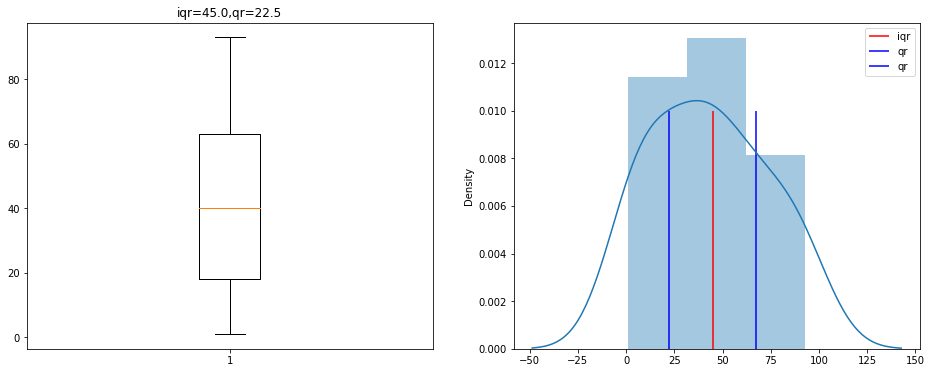

In [27]:
data=np.random.randint(1,100,20)
iqr=stats.iqr(data)
qr=iqr/2

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.boxplot(data)
plt.title('iqr={0},qr={1}'.format(iqr,qr))

plt.subplot(1,2,2)
sns.distplot(data)
plt.vlines(iqr,0,0.010,'r',label='iqr')
plt.vlines(iqr+qr,0,0.010,'b',label='qr')
plt.vlines(iqr-qr,0,0.010,'b',label='qr')
plt.legend()
plt.show()

# 平均偏差(MD)
データの各値が平均からどれだけ離れているかを足し合わせた値から平均をとったもの。つまり偏差の絶対値に合計。  
MDが小さいほどデータのばらつきは小さく、大きければばらつきが大きいといえる。  
ただし、絶対値だとすべて足し合わせることで０になってしまうので、２乗を使う。  
これを**分散**という。  
ただし、2乗することで実際の値と異なるので分散の平方根をとった値、これが**平均偏差**になる。



*   s**2=分散
*   s=平均偏差



In [28]:
def get_var(samples):
  mean=np.mean(samples)

  div=(samples-mean)*(samples-mean)
  var=np.sum(div)/len(samples)
  std=np.sqrt(var)
  return var,std

samples=np.random.rand(100)
var,std=get_var(samples)
print('var={},std={}'.format(var,std))

var=0.07932617096284104,std=0.2816490208803166


In [29]:
np.var(samples),np.std(samples)

(0.07932617096284104, 0.2816490208803166)

scipyを用いてs,s**2を求める。

In [30]:
tvar=stats.tvar(samples)
tstd=stats.tstd(samples)
print(tvar,tstd)

0.08012744541701115 0.28306791661544967


pandasを用いてs,s**2を求める

In [33]:
df=pd.DataFrame([samples]).T
df[0].var(),df[0].std()

(0.08012744541701111, 0.28306791661544956)

# 不遍分散


*   母集団分散の推定量である
*   ある値が平均的に母集団のパラメータと一致する場合、この推定量は不偏である。
*   分散に対してデータの個数n個でなく **(n-1)** で割る。



In [35]:
samples=np.random.rand(100)
mean=np.mean(samples)

data=[]
for i in range(1000):
  sample=np.random.choice(samples,size=5)
  choice_mean=np.mean(sample)
  data.append(choice_mean)

print('mean={0},choicies_mean={1}'.format(mean,np.mean(data)))

mean=0.49332065947727366,choicies_mean=0.4956820021105569


**このように、標本から1000回抽出したデータの平均値は、母集団の平均値に限りなく近くなる。**  
つまり、**標本の平均は母集団平均の不偏推定量である**といえる。  
これは分散、標準偏差も当てはまる。  
またこれらは**確率的に変動する**。

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


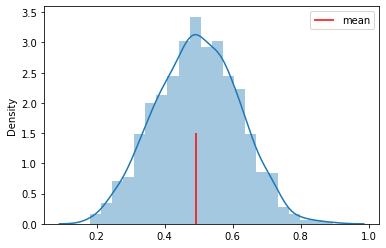

In [39]:
sns.distplot(data)
plt.vlines(mean,0,1.5,'r',label='mean')
plt.legend()
plt.show()



1.   (mean+std) 2/3のデータ
2.   (mean+std*2) 95%のデータ
2.   (mean+std*3) 99.9%のデータ




In [45]:
rand=np.random.rand(1000)

mean=np.sum(rand)/len(rand)
var=np.sum((rand-mean)**2)/len(rand)
std=np.sqrt(var)

count=0

for i in rand:
  if i > mean-std and i < mean+std:
    count += 1
print('{:.1f}% of the numbers includeed within mean std'.format(count/len(rand)*100))

56.5% of the numbers includeed within mean std


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


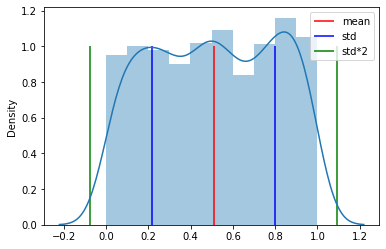

In [47]:
sns.distplot(rand)
plt.vlines(mean,0,1.0,'r',label='mean')
plt.vlines(mean-std,0,1.0,'b',label='std')
plt.vlines(mean+std,0,1.0,'b')
plt.vlines(mean-std*2,0,1.0,'g',label='std*2')
plt.vlines(mean+std*2,0,1.0,'g')
plt.legend()
plt.show()

# 標準化(z)
平均０、分散１となるようなデータ集合体。


> あるデータ集合体xを標準化する。 

```
 z = ( x-np.mean(x) )/np.std(x)
```
**データをばらつきの割合はそのままで中央に寄せたイメージ**


In [68]:
samples=np.random.randn(1000)

mean=np.sum(samples)/len(samples)
var=np.sum((samples-mean)**2)/len(samples)
std=np.sqrt(var)

z=(samples-mean)/std
z[:10]

array([-1.06090961, -0.65848639,  0.84120875,  0.02854689, -0.81403562,
        1.02812921, -1.16756806,  0.39768483, -0.40707332,  0.97472104])

In [64]:
np.mean(z),np.var(z)

(0.0, 1.0000000000000002)

In [65]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler=StandardScaler()
scaler.fit_transform(samples.reshape(-1,1)).ravel()[:1]

array([1.77919883])

ちなみに、zに*10+50で偏差値になる。

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


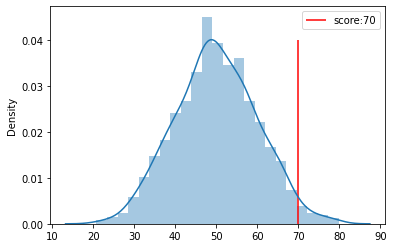

In [71]:
sns.distplot(z*10+50)
plt.vlines(70,0,0.04,'r',label='score:70')
plt.legend()
plt.show()